# Explorando as taxas de desemprego nos Estados Unidos e sua relação com a Educação

## Introdução
![imagem](https://images.unsplash.com/photo-1434030216411-0b793f4b4173?ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&ixlib=rb-1.2.1&auto=format&fit=crop&w=1170&q=80)
Imagem por Green Chameleon, em [Unsplash](https://unsplash.com/photos/s9CC2SKySJM).


#### Projeto desenvolvido durante a Disciplina "Análise de Dados", do curso de Pós-graduação em Visão Computacional, no CIn-UFPE.

#### Autor: Michel de Araújo

Neste projeto iremos realizar uma análise exploratória no data set "USA Unemployment & Education Level", fornecido pelo [Kaggle](https://www.kaggle.com/valbauman/student-engagement-online-learning-supplement) e originalmente retirado do [Departamento de agricultura dos Estados Unidos](https://www.ers.usda.gov/data-products/county-level-data-sets/). Este dataset contém dados sobre a taxa de desemprego e nível educacional de adultos em diversos estados do Estados Unidos. As localidades estão bem distribuidas, com informações como Município, Cidade, Subúrbio, Centro ou Rural. Os dados datam deste o ano 2000 até o ano 2020. Este dataset consiste de dois arquivos do tipo CSV que mostram diferentes informações sobre o contexto.

## Bibliotecas
Começamos importando todas as bibliotecas que serão utilizadas neste projeto.

In [228]:
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Configurando a quantidade de colunas para mostrar no Pandas
pd.set_option('display.max_columns', 500)

##  Carregando os dados

Começamos a análise importando e conhecendo o formato dos dados e os tipos de informações que eles possuem.

#### Educação

In [229]:
escolaridade = pd.read_csv('education.csv')
escolaridade.head()

,FIPS Code,State,Area name,2003 Rural-urban Continuum Code,2003 Urban Influence Code,2013 Rural-urban Continuum Code,2013 Urban Influence Code,City/Suburb/Town/Rural 2013,"Less than a high school diploma, 1970","High school diploma only, 1970","Some college (1-3 years), 1970","Four years of college or higher, 1970","Percent of adults with less than a high school diploma, 1970","Percent of adults with a high school diploma only, 1970","Percent of adults completing some college (1-3 years), 1970","Percent of adults completing four years of college or higher, 1970","Less than a high school diploma, 1980","High school diploma only, 1980","Some college (1-3 years), 1980","Four years of college or higher, 1980","Percent of adults with less than a high school diploma, 1980","Percent of adults with a high school diploma only, 1980","Percent of adults completing some college (1-3 years), 1980","Percent of adults completing four years of college or higher, 1980","Less than a high school diploma, 1990","High school diploma only, 1990","Some college or associate's degree, 1990","Bachelor's degree or higher, 1990","Percent of adults with less than a high school diploma, 1990","Percent of adults with a high school diploma only, 1990","Percent of adults completing some college or associate's degree, 1990","Percent of adults with a bachelor's degree or higher, 1990","Less than a high school diploma, 2000","High school diploma only, 2000","Some college or associate's degree, 2000","Bachelor's degree or higher, 2000","Percent of adults with less than a high school diploma, 2000","Percent of adults with a high school diploma only, 2000","Percent of adults completing some college or associate's degree, 2000","Percent of adults with a bachelor's degree or higher, 2000","Less than a high school diploma, 2015-19","High school diploma only, 2015-19","Some college or associate's degree, 2015-19","Bachelor's degree or higher, 2015-19","Percent of adults with less than a high school diploma, 2015-19","Percent of adults with a high school diploma only, 2015-19","Percent of adults completing some college or associate's degree, 2015-19","Percent of adults with a bachelor's degree or higher, 2015-19"
0,1007,AL,Bibb County,1.0,1.0,1.0,1.0,City,"5,272","1,402",238,302,73.1,19.4,3.3,4.2,"5,254","2,611",536,433,59.5,29.6,6.1,4.9,"4,850","3,407","1,332",476,48.2,33.8,13.2,4.7,"4,984","4,838","2,756",962,36.8,35.7,20.4,7.1,"3,386","7,256","3,848","1,678",20.9,44.9,23.8,10.4
1,1009,AL,Blount County,1.0,1.0,1.0,1.0,City,"10,677","3,440",626,404,70.5,22.7,4.1,2.7,"11,666","7,011","1,819","1,144",53.9,32.4,8.4,5.3,"9,960","8,763","4,745","1,773",39.5,34.7,18.8,7.0,"9,960","12,136","8,371","3,235",29.6,36.0,24.8,9.6,"7,763","13,299","13,519","5,210",19.5,33.4,34.0,13.1
2,1021,AL,Chilton County,1.0,1.0,1.0,1.0,City,"10,285","2,805",538,415,73.2,20.0,3.8,3.0,"9,678","5,578","1,518","1,158",54.0,31.1,8.5,6.5,"9,023","6,770","3,438","1,550",43.4,32.6,16.5,7.5,"8,757","9,264","5,307","2,574",33.8,35.8,20.5,9.9,"5,474","13,348","7,401","3,823",18.2,44.4,24.6,12.7
3,1073,AL,Jefferson County,1.0,1.0,1.0,1.0,City,"186,882","101,656","32,182","33,827",52.7,28.7,9.1,9.5,"141,531","132,921","63,342","63,229",35.3,33.1,15.8,15.8,"111,325","120,393","109,272","84,718",26.2,28.3,25.7,19.9,"82,950","121,233","123,142","106,833",19.1,27.9,28.4,24.6,"44,684","118,636","136,299","150,124",9.9,26.4,30.3,33.4
4,1115,AL,St. Clair County,1.0,1.0,1.0,1.0,City,"10,304","3,540",666,471,68.8,23.6,4.4,3.1,"11,841","7,947","2,335","1,519",50.1,33.6,9.9,6.4,"12,450","10,492","6,271","2,708",39.0,32.9,19.6,8.5,"12,353","14,921","11,036","4,791",28.7,34.6,25.6,11.1,"9,488","21,849","20,207","9,880",15.4,35.6,32.9,16.1


Podemos perceber que as colunas possuem nomes longos e explicativos. Isso pode ser bom para conhecermos o dataset mas pode se tornar ruim na hora de realizar as manipulações.

In [230]:
escolaridade.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3283 entries, 0 to 3282
Data columns (total 48 columns):
 #   Column                                                                    Non-Null Count  Dtype  
---  ------                                                                    --------------  -----  
 0   FIPS Code                                                                 3283 non-null   int64  
 1   State                                                                     3283 non-null   object 
 2   Area name                                                                 3283 non-null   object 
 3   2003 Rural-urban Continuum Code                                           3221 non-null   float64
 4   2003 Urban Influence Code                                                 3221 non-null   float64
 5   2013 Rural-urban Continuum Code                                           3221 non-null   float64
 6   2013 Urban Influence Code                                       

Como o nome sugere, este arquivo nos fornece informações relacionadas ao nível educacional dos cidadões Americanos ao longo do tempo. As linhas representam as diferentes localidades, enquanto que as colunas representam os diferentes índices e diferentes anos. Os anos estão descritos em intervalos [1970, 1980, 1990, 2000, 2015-2019].

Perceba também que existe uma pequena quantidade de dados nulos na maioria das colunas, e uma quantidade um pouco maior nas colunas refentes aos anos 70.

#### Desemprego
Agora vamos ver o que o arquivo "unemployment.csv" tem a mostrar.

In [231]:
desemprego = pd.read_csv('unemployment.csv')
desemprego.head()

,FIPS_Code,State,Area_name,Rural_urban_continuum_code_2013,Urban_influence_code_2013,City/Suburb/Town/Rural,Metro_2013,Civilian_labor_force_2000,Employed_2000,Unemployed_2000,Unemployment_rate_2000,Civilian_labor_force_2001,Employed_2001,Unemployed_2001,Unemployment_rate_2001,Civilian_labor_force_2002,Employed_2002,Unemployed_2002,Unemployment_rate_2002,Civilian_labor_force_2003,Employed_2003,Unemployed_2003,Unemployment_rate_2003,Civilian_labor_force_2004,Employed_2004,Unemployed_2004,Unemployment_rate_2004,Civilian_labor_force_2005,Employed_2005,Unemployed_2005,Unemployment_rate_2005,Civilian_labor_force_2006,Employed_2006,Unemployed_2006,Unemployment_rate_2006,Civilian_labor_force_2007,Employed_2007,Unemployed_2007,Unemployment_rate_2007,Civilian_labor_force_2008,Employed_2008,Unemployed_2008,Unemployment_rate_2008,Civilian_labor_force_2009,Employed_2009,Unemployed_2009,Unemployment_rate_2009,Civilian_labor_force_2010,Employed_2010,Unemployed_2010,Unemployment_rate_2010,Civilian_labor_force_2011,Employed_2011,Unemployed_2011,Unemployment_rate_2011,Civilian_labor_force_2012,Employed_2012,Unemployed_2012,Unemployment_rate_2012,Civilian_labor_force_2013,Employed_2013,Unemployed_2013,Unemployment_rate_2013,Civilian_labor_force_2014,Employed_2014,Unemployed_2014,Unemployment_rate_2014,Civilian_labor_force_2015,Employed_2015,Unemployed_2015,Unemployment_rate_2015,Civilian_labor_force_2016,Employed_2016,Unemployed_2016,Unemployment_rate_2016,Civilian_labor_force_2017,Employed_2017,Unemployed_2017,Unemployment_rate_2017,Civilian_labor_force_2018,Employed_2018,Unemployed_2018,Unemployment_rate_2018,Civilian_labor_force_2019,Employed_2019,Unemployed_2019,Unemployment_rate_2019,Civilian_labor_force_2020,Employed_2020,Unemployed_2020,Unemployment_rate_2020,Median_Household_Income_2019,Med_HH_Income_Percent_of_State_Total_2019
0,1007,AL,"Bibb County, AL",1.0,1.0,City,1.0,"8,623","8,160",463,5.4,"9,134","8,513",621,6.8,"8,961","8,333",628,7.0,"8,871","8,346",525,5.9,"8,851","8,375",476,5.4,"8,837","8,444",393,4.4,"8,858","8,489",369,4.2,"8,810","8,443",367,4.2,"8,751","8,225",526,6.0,"8,696","7,637","1,059",12.2,"8,936","7,931","1,005",11.2,"8,932","8,000",932,10.4,"8,808","8,037",771,8.8,"8,699","8,000",699,8.0,"8,573","7,959",614,7.2,"8,552","7,983",569,6.7,"8,539","7,986",553,6.5,"8,527","8,142",385,4.5,"8,569","8,229",340,4.0,"8,639","8,371",268,3.1,"8,640","8,067",573,6.6,"47,918",92.6
1,1009,AL,"Blount County, AL",1.0,1.0,City,1.0,"25,266","24,375",891,3.5,"25,450","24,521",929,3.7,"25,836","24,436","1,400",5.4,"26,008","24,812","1,196",4.6,"26,237","25,149","1,088",4.1,"26,378","25,434",944,3.6,"26,799","25,939",860,3.2,"26,683","25,816",867,3.2,"26,693","25,405","1,288",4.8,"26,426","24,005","2,421",9.2,"24,928","22,509","2,419",9.7,"25,124","22,951","2,173",8.6,"24,978","23,216","1,762",7.1,"24,860","23,277","1,583",6.4,"24,571","23,074","1,497",6.1,"24,416","23,089","1,327",5.4,"24,380","23,061","1,319",5.4,"24,656","23,631","1,025",4.2,"24,960","24,086",874,3.5,"25,196","24,516",680,2.7,"24,661","23,653","1,008",4.1,"52,902",102.2
2,1021,AL,"Chilton County, AL",1.0,1.0,City,1.0,"19,601","18,752",849,4.3,"19,580","18,631",949,4.8,"19,452","18,456",996,5.1,"19,557","18,581",976,5.0,"19,650","18,738",912,4.6,"19,623","18,859",764,3.9,"19,792","19,087",705,3.6,"19,777","19,093",684,3.5,"19,609","18,583","1,026",5.2,"19,393","17,501","1,892",9.8,"19,474","17,502","1,972",10.1,"19,536","17,761","1,775",9.1,"19,396","17,960","1,436",7.4,"19,339","18,052","1,287",6.7,"19,130","17,938","1,192",6.2,"19,089","18,005","1,084",5.7,"19,029","17,982","1,047",5.5,"19,203","18,396",807,4.2,"19,538","18,834",704,3.6,"19,841","19,296",545,2.7,"19,592","18,618",974,5.0,"49,692",96.0
3,1073,AL,"Jefferson County, AL",1.0,1.0,City,1.0,"331,141","317,868","13,273",4.0,"327,780","313,445","14,335",4.4,"323,104","306,259","16,845",5.2,"322,328","304,626","17,702",5.5,"320,629","303,868","16,761",5.2,"316,522","302,586","13,936",4.4,"317,080","304,463",

Já este arquivo está com as colunas com a nomenclatura mais adequada.

In [232]:
desemprego.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3275 entries, 0 to 3274
Data columns (total 93 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   FIPS_Code                                  3275 non-null   int64  
 1   State                                      3275 non-null   object 
 2   Area_name                                  3275 non-null   object 
 3   Rural_urban_continuum_code_2013            3219 non-null   float64
 4   Urban_influence_code_2013                  3219 non-null   float64
 5   City/Suburb/Town/Rural                     3219 non-null   object 
 6   Metro_2013                                 3222 non-null   float64
 7   Civilian_labor_force_2000                  3270 non-null   object 
 8   Employed_2000                              3270 non-null   object 
 9   Unemployed_2000                            3270 non-null   object 
 10  Unemployment_rate_2000  

Este arquivo nos traz informações sobre o desemprego nos municípios. Diferentemente do dataset anterior, aqui os dados aqui são anuais e mostram: 

1) A quantidade de pessoas aptas à trabalhar (Civilian_labor_force); 

2) A quantidade de pessoas empregadas (Employed);

3) A quantidade de pessoas desempregadas (Unemployment);

4) A porcentagem de pessoas desempregadas, ou seja, a taxa de desemprego (Unemployment_rate).

Agora vamos partir para a próxima seção: Pré-processamento

## Pré-processamento: Escolaridade
Existem algumas colunas em ambos os datasets que não irão nos fornecer informações relevantes, como "Median_Household_income", pois este dado só existe para o ano de 2020, no dataset de desemprego, assim como as colunas "Urban_continum_code" em ambos os datasets. Dessa forma, iremos remover estas colunas.

### Remoção de colunas
Primeiro vamos tratar os dados relativos aos níveis educacionais.

In [233]:
escolaridade = escolaridade.drop(["2003 Rural-urban Continuum Code",
                         "2003 Urban Influence Code",
                         "2013 Rural-urban Continuum Code",
                         "2013 Urban Influence Code"],
                        axis=1)

Nesta análise iremos trabalhar apenas com os valores percentuais para os níveis de escolaridade. Dessa forma, vamos também remover as colunas que representam os valores absolutos.

In [234]:
escolaridade = escolaridade.drop(["Less than a high school diploma, 1970",
                                  "High school diploma only, 1970",
                                  "Some college (1-3 years), 1970",
                                  "Four years of college or higher, 1970",
                                  "Less than a high school diploma, 1980",
                                  "High school diploma only, 1980",
                                  "Some college (1-3 years), 1980",
                                  "Four years of college or higher, 1980",
                                  "Less than a high school diploma, 1990",
                                  "High school diploma only, 1990",
                                  "Some college or associate's degree, 1990",
                                  "Bachelor's degree or higher, 1990",
                                  "Less than a high school diploma, 2000",
                                  "High school diploma only, 2000",
                                  "Some college or associate's degree, 2000",
                                  "Bachelor's degree or higher, 2000",
                                  "Less than a high school diploma, 2015-19",
                                  "High school diploma only, 2015-19",
                                  "Some college or associate's degree, 2015-19",
                                  "Bachelor's degree or higher, 2015-19",
], axis=1)

In [235]:
escolaridade.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3283 entries, 0 to 3282
Data columns (total 24 columns):
 #   Column                                                                    Non-Null Count  Dtype  
---  ------                                                                    --------------  -----  
 0   FIPS Code                                                                 3283 non-null   int64  
 1   State                                                                     3283 non-null   object 
 2   Area name                                                                 3283 non-null   object 
 3   City/Suburb/Town/Rural 2013                                               3221 non-null   object 
 4   Percent of adults with less than a high school diploma, 1970              3186 non-null   float64
 5   Percent of adults with a high school diploma only, 1970                   3186 non-null   float64
 6   Percent of adults completing some college (1-3 years), 1970     

In [236]:
escolaridade.head()

,FIPS Code,State,Area name,City/Suburb/Town/Rural 2013,"Percent of adults with less than a high school diploma, 1970","Percent of adults with a high school diploma only, 1970","Percent of adults completing some college (1-3 years), 1970","Percent of adults completing four years of college or higher, 1970","Percent of adults with less than a high school diploma, 1980","Percent of adults with a high school diploma only, 1980","Percent of adults completing some college (1-3 years), 1980","Percent of adults completing four years of college or higher, 1980","Percent of adults with less than a high school diploma, 1990","Percent of adults with a high school diploma only, 1990","Percent of adults completing some college or associate's degree, 1990","Percent of adults with a bachelor's degree or higher, 1990","Percent of adults with less than a high school diploma, 2000","Percent of adults with a high school diploma only, 2000","Percent of adults completing some college or associate's degree, 2000","Percent of adults with a bachelor's degree or higher, 2000","Percent of adults with less than a high school diploma, 2015-19","Percent of adults with a high school diploma only, 2015-19","Percent of adults completing some college or associate's degree, 2015-19","Percent of adults with a bachelor's degree or higher, 2015-19"
0,1007,AL,Bibb County,City,73.1,19.4,3.3,4.2,59.5,29.6,6.1,4.9,48.2,33.8,13.2,4.7,36.8,35.7,20.4,7.1,20.9,44.9,23.8,10.4
1,1009,AL,Blount County,City,70.5,22.7,4.1,2.7,53.9,32.4,8.4,5.3,39.5,34.7,18.8,7.0,29.6,36.0,24.8,9.6,19.5,33.4,34.0,13.1
2,1021,AL,Chilton County,City,73.2,20.0,3.8,3.0,54.0,31.1,8.5,6.5,43.4,32.6,16.5,7.5,33.8,35.8,20.5,9.9,18.2,44.4,24.6,12.7
3,1073,AL,Jefferson County,City,52.7,28.7,9.1,9.5,35.3,33.1,15.8,15.8,26.2,28.3,25.7,19.9,19.1,27.9,28.4,24.6,9.9,26.4,30.3,33.4
4,1115,AL,St. Clair County,City,68.8,23.6,4.4,3.1,50.1,33.6,9.9,6.4,39.0,32.9,19.6,8.5,28.7,34.6,25.6,11.1,15.4,35.6,32.9,16.1


### Transformação de formato largo para longo

A primeira coisa de podemos fazer para melhorar a estrutura deste DataFrame é transformá-lo do formado largo para longo. Assim, ficará muito mais intuitivo e simples de manipular e fazer gráficos. Para fazer isto, irei utilizar a função melt() do próprio pandas. Esta função reune todas as colunas não informadas como argumento e as transforma em forma de linhas de uma única coluna, enquanto que os outros valores serão redistribuídos e duplicados.

In [237]:
escolaridade = pd.melt(escolaridade, id_vars=["FIPS Code", "State", "Area name", "City/Suburb/Town/Rural 2013"])
escolaridade.head()

,FIPS Code,State,Area name,City/Suburb/Town/Rural 2013,variable,value
0,1007,AL,Bibb County,City,Percent of adults with less than a high school...,73.1
1,1009,AL,Blount County,City,Percent of adults with less than a high school...,70.5
2,1021,AL,Chilton County,City,Percent of adults with less than a high school...,73.2
3,1073,AL,Jefferson County,City,Percent of adults with less than a high school...,52.7
4,1115,AL,St. Clair County,City,Percent of adults with less than a high school...,68.8


In [238]:
# Verificando se todas as colunas foram incluidas na coluna variable 
escolaridade.variable.unique()

array(['Percent of adults with less than a high school diploma, 1970',
       'Percent of adults with a high school diploma only, 1970',
       'Percent of adults completing some college (1-3 years), 1970',
       'Percent of adults completing four years of college or higher, 1970',
       'Percent of adults with less than a high school diploma, 1980',
       'Percent of adults with a high school diploma only, 1980',
       'Percent of adults completing some college (1-3 years), 1980',
       'Percent of adults completing four years of college or higher, 1980',
       'Percent of adults with less than a high school diploma, 1990',
       'Percent of adults with a high school diploma only, 1990',
       "Percent of adults completing some college or associate's degree, 1990",
       "Percent of adults with a bachelor's degree or higher, 1990",
       'Percent of adults with less than a high school diploma, 2000',
       'Percent of adults with a high school diploma only, 2000',
       "P

Agora temos um DataFrame no formato longo, que geralmente é mais intuitivo e simples para realizar análises. Agora precisamos realizar mais um pouco de pré-processamento

### Transformação e renomeação de colunas

Agora o próximo passo é separar as variáveis dos anos, criando uma coluna separadada para descrever o ano informado dos dados. Para fazer isto, basta usar o método df.column.str.split()

In [239]:
escolaridade[['nivelEscolaridade', 'Ano']] = escolaridade.variable.str.split(', ', expand=True)
escolaridade = escolaridade.drop('variable', axis=1)

In [240]:
escolaridade.head()

,FIPS Code,State,Area name,City/Suburb/Town/Rural 2013,value,nivelEscolaridade,Ano
0,1007,AL,Bibb County,City,73.1,Percent of adults with less than a high school...,1970
1,1009,AL,Blount County,City,70.5,Percent of adults with less than a high school...,1970
2,1021,AL,Chilton County,City,73.2,Percent of adults with less than a high school...,1970
3,1073,AL,Jefferson County,City,52.7,Percent of adults with less than a high school...,1970
4,1115,AL,St. Clair County,City,68.8,Percent of adults with less than a high school...,1970


Agora precisamos tratar a coluna **"value"**, que possui valores do tipo str que deveria ser inteiros, e dar uma nomenclatura mais adequada.

In [241]:
# Criando uma função para mapear uma transformação de tipo
def mudar_tipo(row):
    if type(row) == str:
        return float(row.replace(',', ''))
    else:
        return row

In [242]:
# Aplicando a transformação de tipo
escolaridade['value'] = escolaridade['value'].apply(mudar_tipo)
# Renomeando a coluna 'value'
escolaridade = escolaridade.rename(columns={"value": "Porcentagem"})

In [243]:
# Verificando os tipos
escolaridade.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65660 entries, 0 to 65659
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   FIPS Code                    65660 non-null  int64  
 1   State                        65660 non-null  object 
 2   Area name                    65660 non-null  object 
 3   City/Suburb/Town/Rural 2013  64420 non-null  object 
 4   Porcentagem                  65075 non-null  float64
 5   nivelEscolaridade            65660 non-null  object 
 6   Ano                          65660 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 3.5+ MB


Agora precisamos tratar a coluna **"ano"**. A partir do ano de 2015 temos uma str "2015-19". Como sabemos que se trata de 2015 a 2019, vamos substuir por 2015.

In [244]:
# Removendo o "19" do ano e deixando apenas o 2015
escolaridade['Ano'] = escolaridade.Ano.apply(lambda x: x.replace("2015-19", '2015'))
# Transformando o tipo
escolaridade['Ano'] = escolaridade.Ano.apply(lambda x: int(x))

In [245]:
escolaridade.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65660 entries, 0 to 65659
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   FIPS Code                    65660 non-null  int64  
 1   State                        65660 non-null  object 
 2   Area name                    65660 non-null  object 
 3   City/Suburb/Town/Rural 2013  64420 non-null  object 
 4   Porcentagem                  65075 non-null  float64
 5   nivelEscolaridade            65660 non-null  object 
 6   Ano                          65660 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 3.5+ MB


In [246]:
escolaridade.head()

,FIPS Code,State,Area name,City/Suburb/Town/Rural 2013,Porcentagem,nivelEscolaridade,Ano
0,1007,AL,Bibb County,City,73.1,Percent of adults with less than a high school...,1970
1,1009,AL,Blount County,City,70.5,Percent of adults with less than a high school...,1970
2,1021,AL,Chilton County,City,73.2,Percent of adults with less than a high school...,1970
3,1073,AL,Jefferson County,City,52.7,Percent of adults with less than a high school...,1970
4,1115,AL,St. Clair County,City,68.8,Percent of adults with less than a high school...,1970


## Pré-processamento: Desemprego
Agora partimos para o pré-processamento dos dados relativos ao desemprego, do arquivo "Unemployment"

### Remoção de características

Como fizemos antes, vamos selecionar apenas as colunas que iremos utilizar nas análises.

In [247]:
desemprego = desemprego.drop(["Rural_urban_continuum_code_2013",
                             "Urban_influence_code_2013",
                             "Metro_2013",
                             "Median_Household_Income_2019",
                             "Med_HH_Income_Percent_of_State_Total_2019"],
                            axis=1)

In [248]:
desemprego = desemprego.drop(["Employed_2000",
                              "Unemployed_2000",
                              "Employed_2001",
                              "Unemployed_2001",
                              "Employed_2002",
                              "Unemployed_2002",
                              "Employed_2003",
                              "Unemployed_2003",
                              "Employed_2004",
                              "Unemployed_2004",
                              "Employed_2005",
                              "Unemployed_2005",
                              "Employed_2006",
                              "Unemployed_2006",
                              "Employed_2007",
                              "Unemployed_2007",
                              "Employed_2008",
                              "Unemployed_2008",
                              "Employed_2009",
                              "Unemployed_2009",
                              "Employed_2010",
                              "Unemployed_2010",
                              "Employed_2011",
                              "Unemployed_2011",
                              "Employed_2012",
                              "Unemployed_2012",
                              "Employed_2013",
                              "Unemployed_2013",
                              "Employed_2014",
                              "Unemployed_2014",
                              "Employed_2015",
                              "Unemployed_2015",
                              "Employed_2016",
                              "Unemployed_2016",
                              "Employed_2017",
                              "Unemployed_2017",
                              "Employed_2018",
                              "Unemployed_2018",
                              "Employed_2019",
                              "Unemployed_2019",
                              "Employed_2020",
                              "Unemployed_2020"
                             ],
                            axis=1)

In [249]:
desemprego.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3275 entries, 0 to 3274
Data columns (total 46 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   FIPS_Code                  3275 non-null   int64  
 1   State                      3275 non-null   object 
 2   Area_name                  3275 non-null   object 
 3   City/Suburb/Town/Rural     3219 non-null   object 
 4   Civilian_labor_force_2000  3270 non-null   object 
 5   Unemployment_rate_2000     3270 non-null   float64
 6   Civilian_labor_force_2001  3270 non-null   object 
 7   Unemployment_rate_2001     3270 non-null   float64
 8   Civilian_labor_force_2002  3270 non-null   object 
 9   Unemployment_rate_2002     3270 non-null   float64
 10  Civilian_labor_force_2003  3270 non-null   object 
 11  Unemployment_rate_2003     3270 non-null   float64
 12  Civilian_labor_force_2004  3270 non-null   object 
 13  Unemployment_rate_2004     3270 non-null   float

Com as features devidamente selecionadas, podemos partir para a próxima etapa.

### Transformação do formato largo para longo

A primeira coisa de podemos fazer para melhorar a estrutura deste DataFrame é transformá-lo do formado largo para longo. Assim, ficará muito mais intuitivo e simples de manipular e fazer gráficos. Para fazer isto, irei utilizar a função *melt()* do próprio pandas. Esta função reune todas as colunas não informadas como argumento e as transforma em forma de linhas de uma única coluna, enquanto que os outros valores serão redistribuídos e duplicados.

In [250]:
desemprego = pd.melt(desemprego, id_vars=["FIPS_Code", "Area_name", "State", "City/Suburb/Town/Rural"])
desemprego.head()

,FIPS_Code,Area_name,State,City/Suburb/Town/Rural,variable,value
0,1007,"Bibb County, AL",AL,City,Civilian_labor_force_2000,"8,623"
1,1009,"Blount County, AL",AL,City,Civilian_labor_force_2000,"25,266"
2,1021,"Chilton County, AL",AL,City,Civilian_labor_force_2000,"19,601"
3,1073,"Jefferson County, AL",AL,City,Civilian_labor_force_2000,"331,141"
4,1115,"St. Clair County, AL",AL,City,Civilian_labor_force_2000,"31,555"


Agora temos um dataset no formato longo! Porém, ele ainda não está no formato correto.

### Transformação e renomeação de colunas
Precisamos fazer uma transformação na coluna "variable" para separar o tipo da variável (desempregados, empregados, etc.) do ano, pois queremos analisar as variáveis como colunas e o tempo separadamente.

In [251]:
# Primeiro vamos renomear algums termos da coluna "variable", para uniformizar a quantidade de "sublinhados"
desemprego.loc[:, "variable"] = desemprego["variable"].str.replace('Civilian_labor_force', 'aptosTrabalhar')
desemprego.loc[:, "variable"] = desemprego["variable"].str.replace('Unemployment_rate', 'taxaDesemprego')

Agora podemos separar a coluna "variable" e tirar o ano da mesma.

In [252]:
desemprego[["Variavel", "Ano"]] = desemprego.variable.str.split('_', expand=True)
desemprego = desemprego.drop("variable", axis=1)

In [253]:
desemprego.head()

,FIPS_Code,Area_name,State,City/Suburb/Town/Rural,value,Variavel,Ano
0,1007,"Bibb County, AL",AL,City,"8,623",aptosTrabalhar,2000
1,1009,"Blount County, AL",AL,City,"25,266",aptosTrabalhar,2000
2,1021,"Chilton County, AL",AL,City,"19,601",aptosTrabalhar,2000
3,1073,"Jefferson County, AL",AL,City,"331,141",aptosTrabalhar,2000
4,1115,"St. Clair County, AL",AL,City,"31,555",aptosTrabalhar,2000


Agora vamos tratar a coluna **"value"**, pois ela está em formato *str* e com vírgulas.

In [254]:
# Antes remover a vírgula, é necessário remover os valores nulos
print(f"Existem {sum(desemprego.value.isna())} valores nulos de um total de {len(desemprego)}")

Existem 352 valores nulos de um total de 137550


Como a quantidade de nulos é pequena em relação ao dataset inteiro, podemos remover estas linhas

In [255]:
desemprego = desemprego[desemprego.value.isna() == False]

Agora podemos alterar o tipo utilizando a mesma função que criamos anteriormente

In [256]:
desemprego['value'] = desemprego.value.apply(mudar_tipo)

In [257]:
desemprego['Ano'] = desemprego.Ano.apply(lambda x: int(x))

In [258]:
desemprego.head()

,FIPS_Code,Area_name,State,City/Suburb/Town/Rural,value,Variavel,Ano
0,1007,"Bibb County, AL",AL,City,8623.0,aptosTrabalhar,2000
1,1009,"Blount County, AL",AL,City,25266.0,aptosTrabalhar,2000
2,1021,"Chilton County, AL",AL,City,19601.0,aptosTrabalhar,2000
3,1073,"Jefferson County, AL",AL,City,331141.0,aptosTrabalhar,2000
4,1115,"St. Clair County, AL",AL,City,31555.0,aptosTrabalhar,2000


### Expansão da coluna "Variavel"
Perceba que agora temos 2 informações diferentes na coluna "Variavel", e, consequentemente, na conluna "value". Precisamos separar essas duas informação em duas colunas diferentes, onde o nome da coluna é o nome da variável, e as linhas são os respectivos valores.

In [259]:
valoresAptosTrabalhar = desemprego[desemprego["Variavel"] == 'aptosTrabalhar']["value"].values
valoresTaxaDesemprego = desemprego[desemprego["Variavel"] == 'taxaDesemprego']["value"].values

In [260]:
# Verificando se ambos os arrays possuem o mesmo tamanho
print(valoresAptosTrabalhar.shape)
print(valoresTaxaDesemprego.shape)

(68599,)
(68599,)


Já que os arrays possuem o mesmo tamanho (como esperado, afinal, são os mesmas areas e os mesmos anos), podemos selecionar uma parte deste dataframe, dropar as colunas "value" e "variavel", e adicionar os novos dois arrays como colunas:

In [261]:
# Selecionando a metade do DataFrame
desemprego = desemprego[desemprego["Variavel"] == 'aptosTrabalhar']

In [262]:
# Dropando as colunas que não serão utilizadas
desemprego = desemprego.drop(["Variavel", "value"], axis=1)

In [263]:
# Adicionando as novas colunas
desemprego["taxaDesemprego"] = valoresTaxaDesemprego
desemprego["aptosTrabalhar"] = valoresAptosTrabalhar

In [264]:
desemprego.head()

,FIPS_Code,Area_name,State,City/Suburb/Town/Rural,Ano,taxaDesemprego,aptosTrabalhar
0,1007,"Bibb County, AL",AL,City,2000,5.4,8623.0
1,1009,"Blount County, AL",AL,City,2000,3.5,25266.0
2,1021,"Chilton County, AL",AL,City,2000,4.3,19601.0
3,1073,"Jefferson County, AL",AL,City,2000,4.0,331141.0
4,1115,"St. Clair County, AL",AL,City,2000,3.8,31555.0


Ótimo, agora temos o DataFrame da forma mais *Tidy* possível. Vamos para a próxima seção: A análise exploratória

## Análise Exploratória
Com os dados devidamente limpos e organizados, podemos começar a análise exploratória e extrair valor dos dados.

## Desemprego

Podemos começar com uma visão temporal em nível Nacional: Como variou a taxa de desemprego, nos Estados Unidos, durante o período observado?

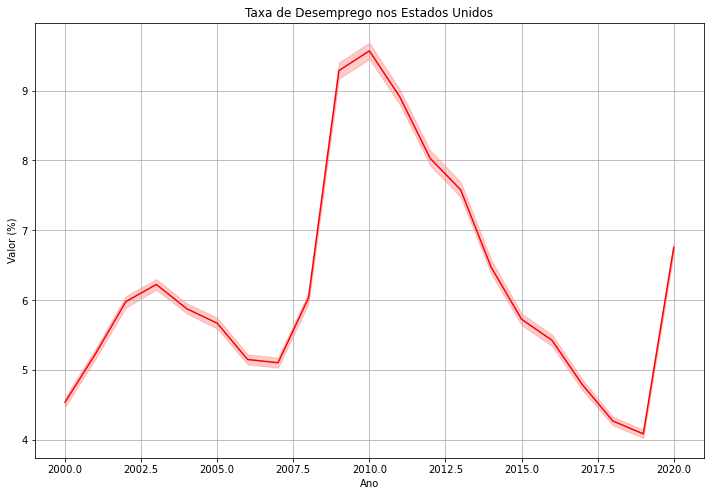

In [265]:
fig = plt.figure(figsize=(12,8))
sns.lineplot(data=desemprego,
            x='Ano',
            y='taxaDesemprego',
            color='red')

plt.xlabel('Ano')
plt.ylabel('Valor (%)')
plt.title("Taxa de Desemprego nos Estados Unidos")
plt.grid()
plt.show()

Podemos perceber que, no período observado, o ano com pior taxa de desemprego foi 2010, equanto que 2019 foi o ano com melhor taxa de desemprego. Também é possível perceber que este valor é homogêneo ao longo do país, não houvendo grande varição entre os estados.

Ao longo dos anos, como foi o crescimento da população e a taxa de desemprego?

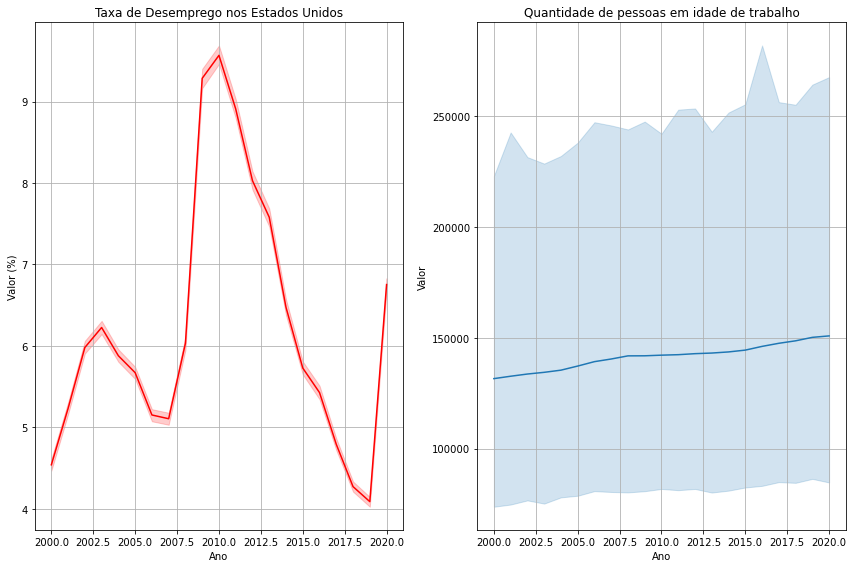

In [266]:
fig, axs = plt.subplots(1, 2, figsize=(12,8))
sns.lineplot(data=desemprego,
            x='Ano',
            y='taxaDesemprego', ax=axs[0],
            color='red')
axs[0].set_xlabel('Ano')
axs[0].set_ylabel('Valor (%)')
axs[0].set_title("Taxa de Desemprego nos Estados Unidos")
axs[0].grid()


sns.lineplot(data=desemprego,
            x='Ano',
            y='aptosTrabalhar', ax=axs[1])

axs[1].set_xlabel('Ano')
axs[1].set_ylabel('Valor')
axs[1].set_title("Quantidade de pessoas em idade de trabalho")
axs[1].grid()
plt.tight_layout()

plt.show()

Apesar de a quantidade de pessoas áptas a trabalhar crescer quase que linearmente, a taxa de desemprego não. Isso ocorre a inúmeros fatores, como crises econômicas e etc. No gráfico à direita, temos uma grande área em azul mais claro do que a linha central. Essa região representa a variabilidade dos dados em relação às Áreas, assim como também temos uma pequena região em volta da linha vermelha no gráfico do desemprego, representando a variabilidade das taxas de acordo com as Áreas.

Como é a taxa de desemprego média em nível estadual no período observado?

In [267]:
desemprego_estadual = desemprego.groupby(by='State').mean().reset_index()
desemprego_estadual.sort_values('taxaDesemprego', ascending=True, inplace=True)

In [268]:
desemprego_estadual.head()

,State,FIPS_Code,Ano,taxaDesemprego,aptosTrabalhar
29,NE,31092.010638,2010.0,3.310841,21134.327761
28,ND,38052.018519,2010.0,3.551940,14087.555556
42,SD,46066.940299,2010.0,3.959559,13149.225302
30,NH,33009.090909,2010.0,4.051948,133672.393939
12,IA,19098.010000,2010.0,4.245000,33264.232381


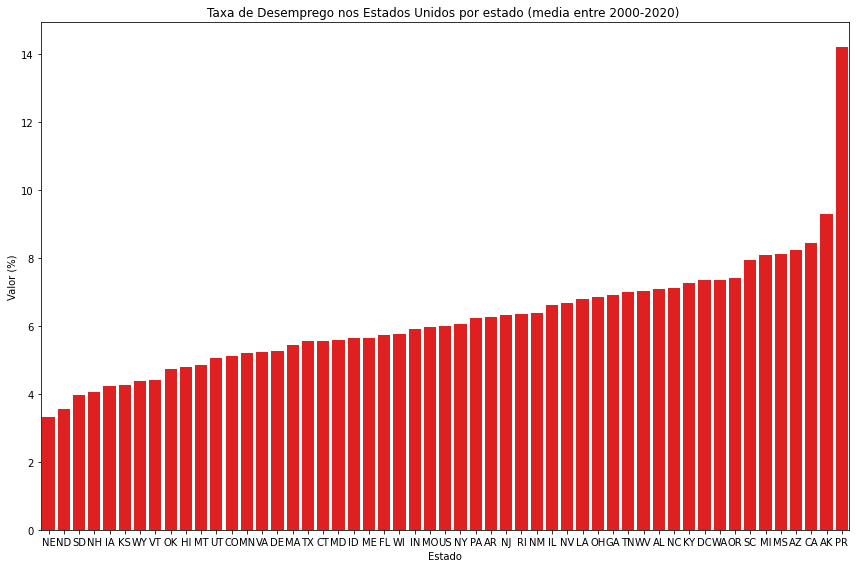

In [269]:
fig = plt.figure(figsize=(12,8))
sns.barplot(data=desemprego_estadual,
            x='State',
            y='taxaDesemprego',
           color='red')
plt.xlabel('Estado')
plt.ylabel('Valor (%)')
plt.title("Taxa de Desemprego nos Estados Unidos por estado (media entre 2000-2020) ")
plt.tight_layout()
plt.show()

Podemos perceber que existem dois estados mais proeminentes quando se traxa da taxa de desemprego média entre 2000 e 2020,
sendo o estado de Puerto Rico o com maior taxa média, enquanto que Nebraska é o estado com menor taxa de desemprego no período registrado. Como ficou essa taxa especificamente para o ano de 2020?

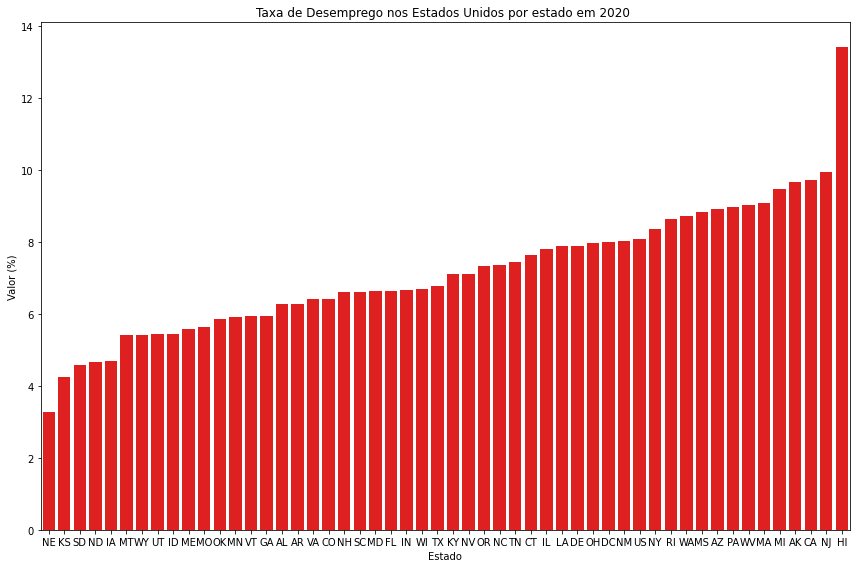

In [270]:
desemprego_estadual_2020 = desemprego[desemprego['Ano'] == 2020].groupby('State').mean().reset_index()
desemprego_estadual_2020.sort_values('taxaDesemprego', ascending=True, inplace=True)

fig = plt.figure(figsize=(12,8))
sns.barplot(data=desemprego_estadual_2020,
            x='State',
            y='taxaDesemprego',
           color='red')
plt.xlabel('Estado')
plt.ylabel('Valor (%)')
plt.title("Taxa de Desemprego nos Estados Unidos por estado em 2020 ")
plt.tight_layout()
plt.show()

Não muito diferente do que a média entre 2000 e 2020.

Podemos também analisar como o desemprego médio está distribuído de acordo com a zona de habitação.

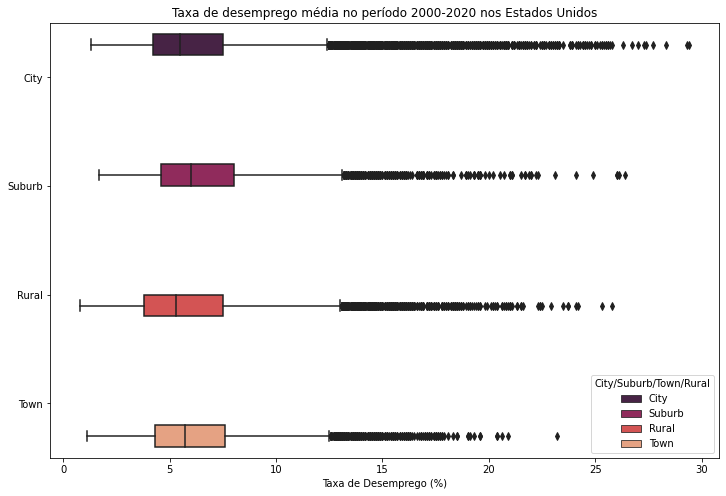

In [271]:
# Fazendo um boxplot para ter uma noção visual da distribuição estatística dos dados.
plt.figure(figsize=(12,8))
sns.boxplot(x='taxaDesemprego',
           y='City/Suburb/Town/Rural',
            hue='City/Suburb/Town/Rural',
           data=desemprego,
           palette='rocket')

plt.xlabel("Taxa de Desemprego (%)")
plt.ylabel("")
plt.title("Taxa de desemprego média no período 2000-2020 nos Estados Unidos")


plt.show()

Podemos visualizar esta informação também através de uma tabela

In [272]:
estats = desemprego[["taxaDesemprego"]].describe().reset_index()
estats.columns = ["Medida","Valor"]
print(estats)

  Medida         Valor
0  count  68599.000000
1   mean      6.224961
2    std      2.988224
3    min      0.800000
4    25%      4.100000
5    50%      5.500000
6    75%      7.600000
7    max     29.400000


Existem bastante outliers no dataset, visto que a 75% dos dados estão abaixo de 8% de desemprego, enquanto que o valor máximo é de 29.4% (Puerto Rico, que não é mais um estado Americano).

Como esta taxa variou durante o período observado, para cada zona geográfica?

In [273]:
# Extraindo a média nacional, para cada ano
desemprego_zonas = desemprego.groupby(by=["City/Suburb/Town/Rural", "Ano"]).mean().reset_index()

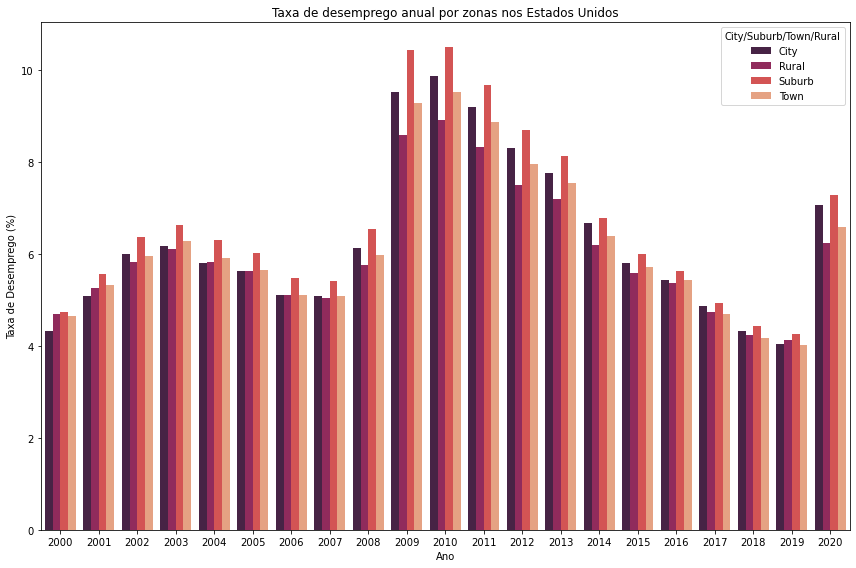

In [274]:
# Criando um gráfico de barras para mostrar o desemprego médio no período observado, levando em considerando cada zona geográfica.
fig = plt.figure(figsize=(12,8))
sns.barplot(data=desemprego_zonas,
           x='Ano',
           y='taxaDesemprego',
           hue='City/Suburb/Town/Rural',
           palette='rocket')

plt.xlabel("Ano")
plt.ylabel("Taxa de Desemprego (%)")
plt.title("Taxa de desemprego anual por zonas nos Estados Unidos")
plt.tight_layout()
plt.show()

Podemos ver que não há discrepância entre as taxas de desemprego entre as zonas rurais e urbanas e que estes valores sempre se mantém bem próximos uns dos outros ao longo do tempo.

### Detecção de outliers
Vamos analisar estes outliers mais a fundo, utilizando o método de Tukey.

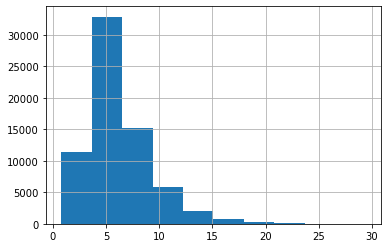

In [275]:
# Verificando a histribuição através de um histograma
desemprego['taxaDesemprego'].hist()
plt.show()

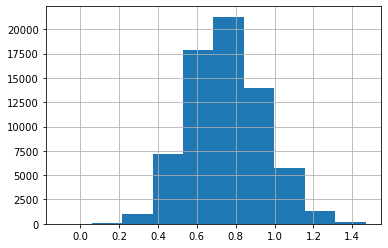

In [276]:
# Transformando para a escala de log10
desemprego['taxaLog'] = np.log10(desemprego['taxaDesemprego'])
desemprego['taxaLog'].hist()
plt.show()

In [277]:
# Calculando os quartis
q1 = desemprego['taxaLog'].quantile(q=0.25)
q3 = desemprego['taxaLog'].quantile(q=0.75)

# Calculando a Amplitude Interquatil
iqr = q3 - q1
print("A Amplitude Interquartil: ", iqr)

limiteInferior = q1-1.5*iqr
limiteSuperior = q3+1.5*iqr

A Amplitude Interquartil:  0.2680297355610559


Por fim, removendo os outliers

In [278]:
desempregoSemOL = desemprego[(desemprego['taxaLog'] > limiteInferior) & (desemprego['taxaLog'] < limiteSuperior)]

### Discretização de variáveis
Nesta seção vamos analisar de maneira discreta como está distribuída a taxa de desemprego nos Estados Unidos.
Para isso, vamos discretar a variável **"taxaDesemprego"** e criar alguns três intervalos: "baixa", "media", e "alta", dividias em iguais intervalos. Para isso, podemos usar a função *cut* do Pandas.

In [279]:
desempregoSemOL.loc[:,'faixaDesemprego'] = pd.cut(x=desempregoSemOL['taxaDesemprego'], bins=3)
desempregoSemOL.head()

c:\users\miche\anaconda3\envs\datascience\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


,FIPS_Code,Area_name,State,City/Suburb/Town/Rural,Ano,taxaDesemprego,aptosTrabalhar,taxaLog,faixaDesemprego
0,1007,"Bibb County, AL",AL,City,2000,5.4,8623.0,0.732394,"(1.683, 7.5]"
1,1009,"Blount County, AL",AL,City,2000,3.5,25266.0,0.544068,"(1.683, 7.5]"
2,1021,"Chilton County, AL",AL,City,2000,4.3,19601.0,0.633468,"(1.683, 7.5]"
3,1073,"Jefferson County, AL",AL,City,2000,4.0,331141.0,0.602060,"(1.683, 7.5]"
4,1115,"St. Clair County, AL",AL,City,2000,3.8,31555.0,0.579784,"(1.683, 7.5]"


Neste caso vamos trabalhar apenas com o ano de 2020

In [280]:
# Agrupando os dados em função da faixa de desemprego e aplicando a função de contagem de ocorrências para 
desemprego_grouped = desempregoSemOL[desempregoSemOL['Ano'] == 2020].groupby(by='faixaDesemprego').count().reset_index()[['taxaDesemprego', 'faixaDesemprego']]

# Adicionando nomes para as faixas de desemprego
desemprego_grouped['faixa'] = np.array(['Baixa', 'Média', 'Alta'])
desemprego_grouped.head()

,taxaDesemprego,faixaDesemprego,faixa
0,2147,"(1.683, 7.5]",Baixa
1,1009,"(7.5, 13.3]",Média
2,34,"(13.3, 19.1]",Alta


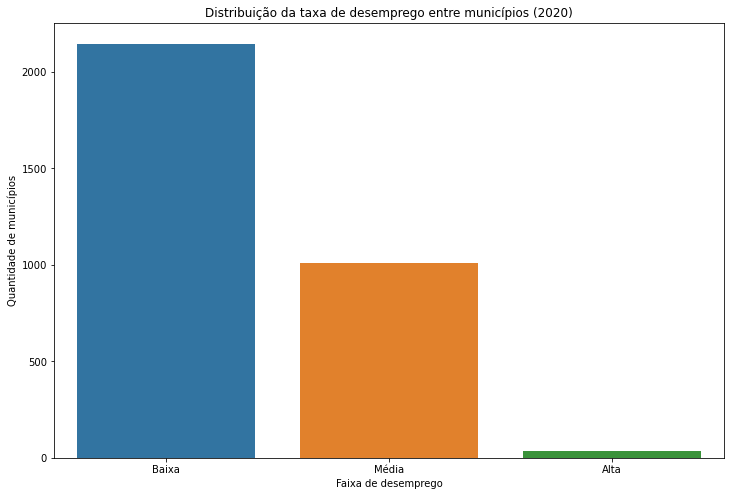

In [281]:
plt.figure(figsize=(12,8))
sns.barplot(data=desemprego_grouped,
           x='faixa',
           y='taxaDesemprego')
plt.title("Distribuição da taxa de desemprego entre municípios (2020)")
plt.xlabel("Faixa de desemprego")
plt.ylabel("Quantidade de municípios")
plt.show()

## Educação
Nesta seção iremos explorar os níveis educacionais nos Estados Unidos no período de 1970 a 2015.

In [282]:
escolaridade

,FIPS Code,State,Area name,City/Suburb/Town/Rural 2013,Porcentagem,nivelEscolaridade,Ano
0,1007,AL,Bibb County,City,73.1,Percent of adults with less than a high school...,1970
1,1009,AL,Blount County,City,70.5,Percent of adults with less than a high school...,1970
2,1021,AL,Chilton County,City,73.2,Percent of adults with less than a high school...,1970
3,1073,AL,Jefferson County,City,52.7,Percent of adults with less than a high school...,1970
4,1115,AL,St. Clair County,City,68.8,Percent of adults with less than a high school...,1970
...,...,...,...,...,...,...,...
65655,53000,WA,Washington,NaN,36.0,Percent of adults with a bachelor's degree or ...,2015
65656,54000,WV,West Virginia,NaN,20.6,Percent of adults with a bachelor's degree or ...,2015
65657,55000,WI,Wisconsin,NaN,30.1,Percent of adults with a bachelor's degree or ...,2015
65658,56000,WY,Wyoming,NaN,27.4,Percent of adults with a bachelor's degree or ...,2015


Como a porcentagem de pessoas com ensino médio completo e ensino superior (bachelor's degree or higher) mudou no tempo?

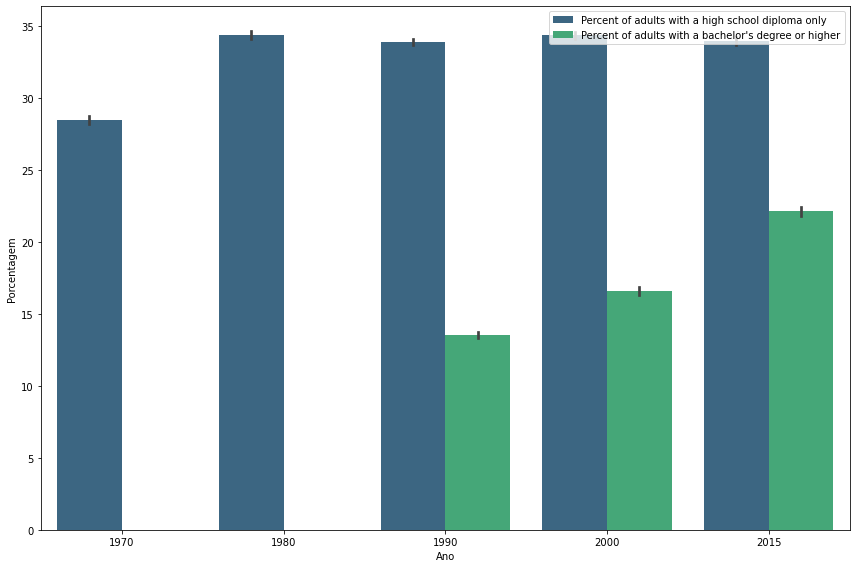

In [283]:
ensino_medio_superior = escolaridade[(escolaridade.nivelEscolaridade == "Percent of adults with a high school diploma only") | 
                                 (escolaridade.nivelEscolaridade == "Percent of adults with a bachelor's degree or higher")]

plt.figure(figsize=(12,8))

sns.barplot(data=ensino_medio_superior,
           x='Ano',
           y='Porcentagem',
           hue='nivelEscolaridade',
           palette='viridis')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

Vemos que a porcetagem de pessoas que possuem apenas o ensino médio não varia muito desde 1980, enquanto que a porcentagem de pessoas que possuem ensino superior cresce a cada década. Podemos perceber que a democratização do ensino superior permitiu que muito mais pessoas tivessem acesso às universidades. No entando, menos do que 25% da população registrada neste dataset possuem ensino superior, o que, considerando o total, é um número pequeno.

E as pessoas que não possuem o ensino médio?

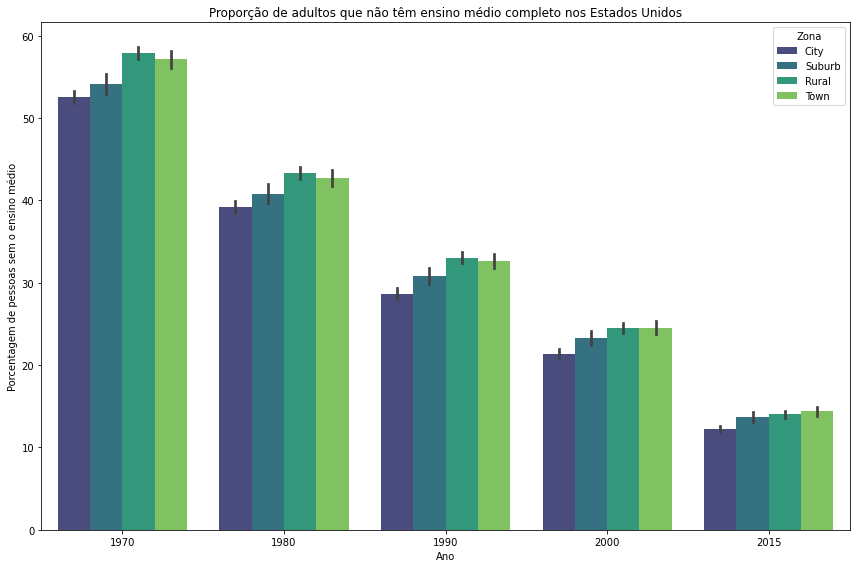

In [284]:
ensino_fundamental = escolaridade[(escolaridade.nivelEscolaridade == "Percent of adults with less than a high school diploma")]

plt.figure(figsize=(12,8))

sns.barplot(data=ensino_fundamental,
           x='Ano',
           y='Porcentagem',
           hue='City/Suburb/Town/Rural 2013',
           palette='viridis')
plt.xlabel("Ano")
plt.ylabel("Porcentagem de pessoas sem o ensino médio")
plt.title("Proporção de adultos que não têm ensino médio completo nos Estados Unidos")
plt.tight_layout()
plt.legend(title="Zona")
plt.show()

A taxa de pessoas que possuem menos do que o ensino médio vem descrescendo quase linearmente com as décadas! No início da década de 70 mais da metade da população dos Estados Unidos não tinha o ensino médio completo, enquanto que em 2015 esse valor era de aproximadamente de 15%.

Vamos verificar como está a distribuição dos percentuais de nível de escolaridade utilizando um boxplot.

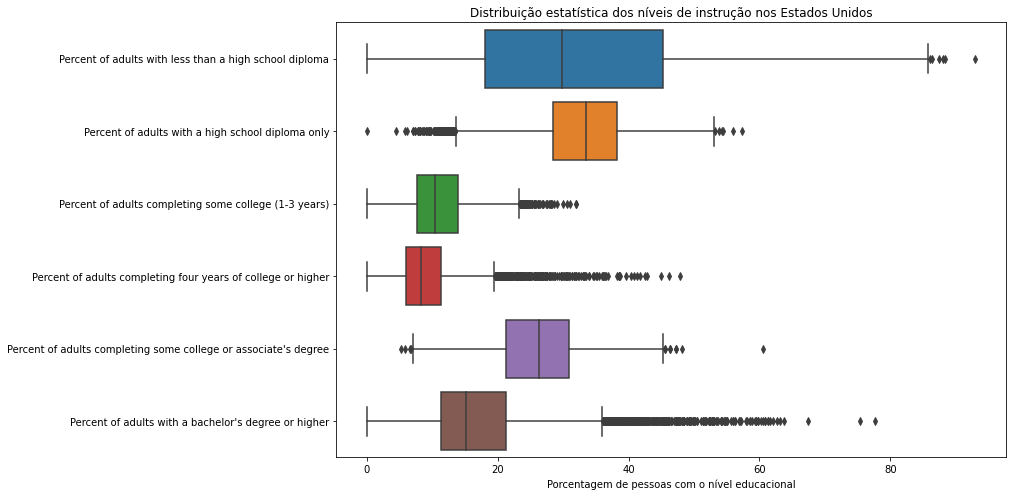

In [285]:
fig, axs = plt.subplots(figsize=(12,8))
sns.boxplot(x='Porcentagem',
           y='nivelEscolaridade',
           data=escolaridade)
axs.set_xlabel('Porcentagem de pessoas com o nível educacional')
axs.set_ylabel("")
axs.set_title('Distribuição estatística dos níveis de instrução nos Estados Unidos')

plt.show()

Concluimos que a distribuição da proporção de pessoas pertencentes a cada nível de escolaridade possui uma distribuição bem diferente! O percentual de pessoas com ensino superior, por exemplo, atinge níveis muito altos em algumas regiões, enquanto que para o percentual de pessoas apenas com o ensino médio, este percentual atinge valores muito pequenos em alguns lugares, formando, assim, outliers superiores e inferiores.

## Unindo as informações

Nesta seção iremos unir os dados sobre educação com os dados sobre o desemprego e verificar se existe alguma correlação entre o nível educacional dos Americanos com a taxa de desemprego.

In [286]:
ensino_medio_superior.head()

,FIPS Code,State,Area name,City/Suburb/Town/Rural 2013,Porcentagem,nivelEscolaridade,Ano
3283,1007,AL,Bibb County,City,19.4,Percent of adults with a high school diploma only,1970
3284,1009,AL,Blount County,City,22.7,Percent of adults with a high school diploma only,1970
3285,1021,AL,Chilton County,City,20.0,Percent of adults with a high school diploma only,1970
3286,1073,AL,Jefferson County,City,28.7,Percent of adults with a high school diploma only,1970
3287,1115,AL,St. Clair County,City,23.6,Percent of adults with a high school diploma only,1970


In [287]:
desemprego.head()

,FIPS_Code,Area_name,State,City/Suburb/Town/Rural,Ano,taxaDesemprego,aptosTrabalhar,taxaLog
0,1007,"Bibb County, AL",AL,City,2000,5.4,8623.0,0.732394
1,1009,"Blount County, AL",AL,City,2000,3.5,25266.0,0.544068
2,1021,"Chilton County, AL",AL,City,2000,4.3,19601.0,0.633468
3,1073,"Jefferson County, AL",AL,City,2000,4.0,331141.0,0.602060
4,1115,"St. Clair County, AL",AL,City,2000,3.8,31555.0,0.579784


### Normalizando as variáveis

Para fazer uma comparação correta entre as taxas de desemprego e de nível de instrução, devemos realizar uma normalização das variáveis para que os valores fiquem entre 0 e 1. Para isso, podemos utilizar a função MinMaxScaler do Scitkit-learn.

In [288]:
from sklearn.preprocessing import MinMaxScaler

In [289]:
scaler = MinMaxScaler()

In [290]:
ensino_scaled = ensino_medio_superior.copy()
ensino_scaled['Porcentagem'] = scaler.fit_transform(ensino_scaled['Porcentagem'].values.reshape(-1,1))

In [291]:
ensino_scaled.head()

,FIPS Code,State,Area name,City/Suburb/Town/Rural 2013,Porcentagem,nivelEscolaridade,Ano
3283,1007,AL,Bibb County,City,0.250000,Percent of adults with a high school diploma only,1970
3284,1009,AL,Blount County,City,0.292526,Percent of adults with a high school diploma only,1970
3285,1021,AL,Chilton County,City,0.257732,Percent of adults with a high school diploma only,1970
3286,1073,AL,Jefferson County,City,0.369845,Percent of adults with a high school diploma only,1970
3287,1115,AL,St. Clair County,City,0.304124,Percent of adults with a high school diploma only,1970


In [292]:
taxaDesemp_scaled = desemprego.copy()
taxaDesemp_scaled['taxaDesemprego'] = scaler.fit_transform(taxaDesemp_scaled['taxaDesemprego'].values.reshape(-1,1))

In [293]:
taxaDesemp_scaled.head()

,FIPS_Code,Area_name,State,City/Suburb/Town/Rural,Ano,taxaDesemprego,aptosTrabalhar,taxaLog
0,1007,"Bibb County, AL",AL,City,2000,0.160839,8623.0,0.732394
1,1009,"Blount County, AL",AL,City,2000,0.094406,25266.0,0.544068
2,1021,"Chilton County, AL",AL,City,2000,0.122378,19601.0,0.633468
3,1073,"Jefferson County, AL",AL,City,2000,0.111888,331141.0,0.602060
4,1115,"St. Clair County, AL",AL,City,2000,0.104895,31555.0,0.579784


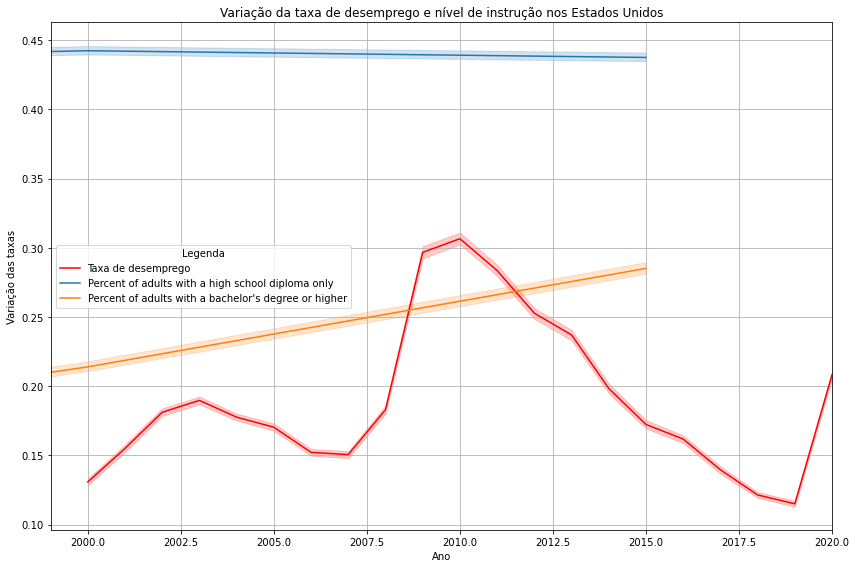

In [295]:
fig, axs = plt.subplots(figsize=(12,8))

# Plotando a taxa de desemprego
sns.lineplot(data=taxaDesemp_scaled,
            x='Ano',
            y='taxaDesemprego',
            color='red',
            ax=axs,
            label='Taxa de desemprego')

axs.set_title('Variação da taxa de desemprego e nível de instrução nos Estados Unidos')
axs.set_xlabel('Ano')
axs.set_ylabel('Variação das taxas')
axs.set_xlim(1999, 2020)
axs.grid()


sns.lineplot(data=ensino_scaled,
            x='Ano',
            y='Porcentagem',
            ax=axs,
            hue='nivelEscolaridade')

axs.legend(title="Legenda",
             loc='center left')
plt.tight_layout()
plt.show()

Como o crescente número de pessoas obtendo o grau de ensino médio completo, poderíamos inferir que a taxa de desemprego poderia cair, visto que existem mais pessoas intruídas no mercado. No entanto, o gráfico acima mostra o contrário: De início, a taxa de desemprego cresceu de forma abrupta durante o período até 2010, e, a partir daí, caiu também de forma  brusca e voltou a subir. Podemos concluir desta análise que apenas o nível de instrução da sociedade é insuficiente para tentar explicar o desemprego em um país. No entanto, o também é possível perceber que, conforme o número de pessoas com o grau de ensino superior ou maior cresceu, a taxa de desemprego caiu. Para obter uma explica mais acertiva sobre isto, devemos levar em consideração muitos outros fatores socioeconômicos.

## Conclusão


Nesta análise de dados vimos diversas formas de preprocessamento de dados: Transformação de colunas em linhas, mudança de tipos de variáveis, expansão de uma coluna em várias a partir da separação de strings, normalização de valores, entre outros. Como resultado, vimos que a taxa de desemprego de um país é uma variável bem complexa, pois ela não é facilmente explicada com dados como crescimento populacional e nível de instrução. Vimos também que a porcentagem de pessoas, nos Estados Unidos, que possuem apenas ensino médio vem decrescendo com o tempo, e a porcentagem de pessoas que possui ensino superior vem crescendo de forma quase linear. E, um detalhe importante, é que este nível de instrução não só está melhorando nas capitais e grandes centros urbanos, como também está melhorando nos centros rurais. 

Estas porcentagem apresentaram grande variabilidade, podendo variar bastante de estado para estado, como visto no boxplot dos níveis de instrução.

Finalizamos com a última figura, vimos que exite uma possível relação entre o número de pessoas com ensino superior e a taxa de desemprego, mas esta relação deve ser investigada mais afundo com a utilização de mais dados.